__The content of this notebook is the same as in the BASIC notebook, but it is shortened for better readability and memorability__

### Graphs
* __vertices / nodes__ w/names (keys) and payloads (additional info);
* unordered = __undirected graph__ vs.__directed graph__ (digraph);
* __weight__ on edge - cost from 1 vertex to the other (distance betw. cities)
* __Path__ - # vertices connected by edges.  
* __Path length__ - # edges in unweighted g. (n−1) OR __sum of weights__ in weighted g.
* __Cycle__ in directed g. - path starts / ends at same vertex.
* If no cycles - __acyclic graph__; if also directed - directed acyclic graph (__DAG__)

__Adjacency matrix__ = 2D matrix size n×n if graph has n vertices. Each cell [i, j]  
indicates whether there is an edge between vertex i and vertex j (if edge - value is  
1 or the weight, and 0 if no edge) - [[0, 1, 1], [1, 0, 0,], [0, 1, 0]  
* __Quick edge lookup t.c.O(1)__ to see if edge present, add/remove edge;
* __Simplicity of matrix__, good for matrix operations (__insights__);
* __Slow iteration - O(n)__ to get  vertex's _adj. list, __O(V^2)__ _add vertex_
* memory hog: __space c. O(n^2)__ => good for __dense graphs__
* __adjacency lists are better for most tasks__
* better for __weighted graphs__;
* __Undirected__ graphs - adj. matrix __symmetric__

__Adjacency list r.__: edge_list = [[0,1], [0,2],] or dict[list] (node: verts) or dict[dicts] (if weights)  
* __Efficient neighb. iteration__ and __time c. O(1)__ _get vertex's adj. list_ (array indexing)
* __Efficient storage__ (__space c. = O(2E)__)
* __Slow edge lookup O(E)__ (E=# v-s) _if edge (i,j) exists_

__Objects/pointer r.__  
* __time c. O(n)__ _access a node_;
* __space c. O(n)__ if nodes only, __O(n^2)__ w/pointers;
* better for __directed graphs__ (pointers);
* __high search time c.__

__Incidence matrix__  
rows = vertices, columns = edges, entries = is vertex incident to edge (bool)

__Edge list__
* = __array of edges__ (edge = two verteICES). If weights - add third element to array or more info to obj.
* Simple, but __time c. to find edge = O(E)__ if edge list unordered, but O(lgE) is desired
* __Space c. Θ(E)__

graph_as_edge_list = [ [0,1], [0,6], [0,8], [1,4], [1,6], [1,9], [2,4], [2,6], [3,4], [3,5], [3,8], [4,5], [4,9], [7,8], [7,9] ]

### Adjacency matrix

In [7]:
# Simple matrix (1s indicate that there is an edge, but it's possible to use weights instead of 1s)
graph_simple_adjacency_matrix = [
  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
  [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
  [0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
]

# https://www.programiz.com/dsa/graph-adjacency-matrix
class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val), end=' '),
            print()


def main():
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)

    g.print_matrix()


if __name__ == '__main__':
    main()

   0    1    1    0    0 
   1    0    1    0    0 
   1    1    0    1    0 
   0    0    1    0    0 
   0    0    0    0    0 


### Adjacency list

In [ ]:
# List of lists (set of sets), unweighted g.: ABC (012)
graph_list = [
  [1, 2],
  [0, 2],
  [0, 1],
  ]

In [ ]:
# Dict of lists/sets, unweighted g.: ABC
graph_dict_unweighted = {
         'A': ['B', 'C'],
         'B': ['A', 'C'],
         'C': ['A', 'B']
}

In [ ]:
# Dict of dicts, weighted g.: ABC
graph_dict_weighted = {
    'A': {'B':5, 'C':2},
    'B': {'A':3, 'C':4},
    'C': {'A':2, 'B':3}
}

There is one more complex representation as an adj list in which each element is a linked list - https://www.programiz.com/dsa/graph-adjacency-list. But this way, arrows inside each adj list don't mean that these two nodes are connected; they actually don't mean anything - counterintuitive!

In [25]:
# Directed graph as adjacency list 
class Graph: 
  
    def __init__(self):        
        self.graph = dict() 
  
    # add edge 
    def addEdge(self, u, v):
        if u in self.graph:
            self.graph[u].add(v)
        else:
            self.graph[u] = set([v])

g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 

print('Printing graph:')
for k, v in g.graph.items():
    print(k, v)

Printing graph:
0 {1, 2}
1 {2}
2 {0, 3}
3 {3}


To make the above undirected, add each pair of vertices twice: first as (0,1) then as (1,0)

### Depth First Search (DFS)
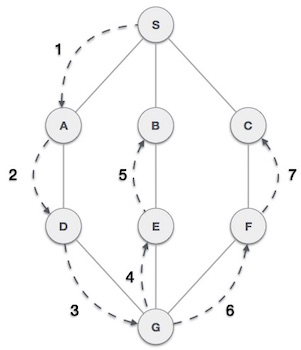

Rules:
* Rule 1 − Visit the adjacent unvisited vertex. Mark it as visited. Display it. Push it in a stack.
* Rule 2 − If no adjacent vertex is found, pop up a vertex from the stack. (It will pop up all the vertices from the stack, which do not have adjacent vertices.)
* Rule 3 − Repeat Rule 1 and Rule 2 until the stack is empty.  
More: [Great graph DFT & BFT visuals and sequence of rules to follow](https://www.programiz.com/dsa/graph-bfs) and [here too](https://www.tutorialspoint.com/data_structures_algorithms/breadth_first_traversal.htm)

Rules (short):
* Mark the current vertex as being visited.
* Explore each adjacent vertex that is not included in the visited set



every edge is considered exactly twice, and every node is processed exactly once, so the complexity has to be a constant multiple of the number of edges and the number of vertices  
_time complexity_ = (V + E), where V is # nodes and E is # edges;  
_space complexity_ = O(V)

Applications:  
* To build index by search index
* For GPS navigation
* Path finding algorithms
* In Ford-Fulkerson algorithm to find maximum flow in a network
* Cycle detection in an undirected graph
* In minimum spanning tree

## DFS
queue.pop(0) for BFS

In [2]:
# time c. O(V+E), space c. O(V)
def dfs(graph, start):    
    visited, stack = set(), [start]    
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            print(vertex, end=' ')
            visited.add(vertex)        
            stack.extend(graph[vertex] - visited)                        
    return visited

graph = { 0: set([1, 2]), 1: set([2]),
          2: set([3]),    3: set([1, 2]) }
dfs(graph, 0)

0 2 3 1 

{0, 1, 2, 3}

In [11]:
# Recursive: https://www.programiz.com/dsa/graph-dfs (BETTER THAN GFG) + Udemy
def dfs2(graph, start, visited=None):
        
    if visited is None:
        visited = set()
    visited.add(start)

    print(start)

    for next in graph[start] - visited:
        dfs2(graph, next, visited)
    return visited


graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

dfs2(graph, '0')

0
1
3
4
2
2


{'0', '1', '2', '3', '4'}

### Breadth First Search (BFS)
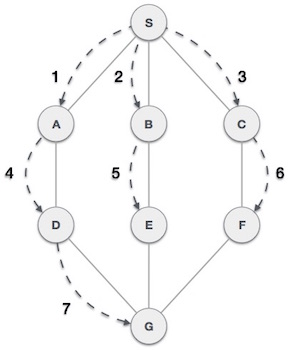

It finds all the vertices that are a __distance k__ from s __before__ it finds any vertices that are a distance __k+1__


Rules:
* Rule 1 − Visit the adjacent unvisited vertex. Mark it as visited. Display it. Insert it in a queue.
* Rule 2 − If no adjacent vertex is found, remove the first vertex from the queue.
* Rule 3 − Repeat Rule 1 and Rule 2 until the queue is empty.  
More: [Great graph DFT & BFT visuals and sequence of rules to follow](https://www.programiz.com/dsa/graph-bfs) and [here too](https://www.tutorialspoint.com/data_structures_algorithms/breadth_first_traversal.htm)


_time complexity_ = (V + E), where V is # nodes and E is # edges;  
_space complexity_ = O(V)

Applications:  
* find path
* test if graph is bipartite
* find strongly connected components
* detect cycles

In [2]:
# Udemy iterative
def bfs(graph, start):
    
    visited = set()
    queue   = [start]
    
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            print(vertex, end = ' ')
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
            
    return visited

graph = {0: set([1, 2]), 1: set([2]), 2: set([3]), 3: set([1, 2])}
bfs(graph, 0)

0 1 2 3 

{0, 1, 2, 3}

## BFS2

In [3]:
def bfs2(graph, start):
    visited, queue = {start}, [start]
    while queue:
        vertex = queue.pop(0)
        print(str(vertex) + " ", end="")
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                                
graph = {0: [1, 2], 1: [2], 2: [3], 3: [1, 2]}
bfs2(graph, 0)

0 1 2 3 

## All Paths from Vertex A to Vertex B

In [76]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for nxt in graph[vertex] - set(path):
            if nxt == goal:
                yield path + [nxt]
            else:
                queue.append((nxt, path + [nxt]))

In [74]:
def dfs_paths(graph, start, goal):        
    stack = [(start, [start])]        
    while stack:
        (vertex, path) = stack.pop()
        for nxt in graph[vertex] - set(path):
            if nxt == goal:
                yield path + [nxt]
            else:
                stack.append((nxt, path + [nxt]))

In [77]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

list(bfs_paths(graph, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

## Shortest path
Always returned first by BFS

In [78]:
def shortest_path(graph, start, goal):
    try:
        return next(bfs_paths(graph, start, goal))
    except StopIteration:
        return None

graph = {'A': set(['B', 'C']),
     'B': set(['A', 'D', 'E']),
     'C': set(['A', 'F']),
     'D': set(['B']),
     'E': set(['B', 'F']),
     'F': set(['C', 'E'])}
    
shortest_path(graph, 'A', 'F')

['A', 'C', 'F']

### Topological Sorting
Possible _only for Directed Acyclic Graph (DAG)_ - __linear ordering of vertices such that for every directed edge uv, vertex u comes before v in the ordering__. There can be __more than one__ topological sorting for a graph. The __first vertex__ in topological sorting is always a vertex with __in-degree 0__ (a vertex with _no incoming edges_).

For example, a topological sorting of the following graph is “5 4 2 3 1 0”; another topological sorting of the following graph is “4 5 2 3 1 0”.
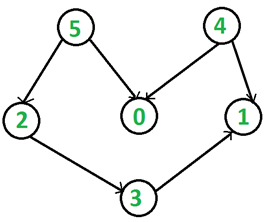

In [1]:
# source: https://algocoding.wordpress.com/2015/04/05/topological-sorting-python/
# Notation: k = node as key, v = node as value inside adjancy list
# Three vars:
# 1) in_degree    =  DICT { node : in-degree }
# 2) q            =  LIST of nodes with 0 in-degree
#                         (when a node is popped from it, in-degree of nodes from its adj. list decreases by 1)
# 3) topo_sorted(topo)  =  LIST of sorted nodes (result)

def kahn_toposort( graph ):    
    topo = []                                                     # sorted nodes        
    in_degree = { k: 0 for k in graph }                           # get in-degree of each node    
    for k in graph:
        for v in graph[ k ]:
            in_degree[v] += 1 
    q = [k for k,v in in_degree.items() if v==0]                  # nodes with 0 in-degree     
    while q:                
        k = q.pop()                                               # remove 1 node w/0 in-degree
        topo.append( k )                 
        for v in graph[ k ]:                                      # decrease in-degree its adjacent vertices
            in_degree[ v ] -= 1
            if in_degree[ v ] == 0:                               # keep track if any other node reaches 0
                q.append( v )                                
    return topo if len(topo)==len(graph) else []                  # no topo_sort if there is a cycle

    
tasks =       { "have lunch" : ["wash the dishes"],
                "cook food" : ["have lunch", "wash the dishes"],
                "wash laundry" : ["dry laundry", "fold laundry"],
                "dry laundry" : ["fold laundry"],
                "fold laundry" : ["cook food"],
                "wash the dishes": ["watch TV"],
                "watch TV": [],
              }

kahn_toposort( tasks )

['wash laundry',
 'dry laundry',
 'fold laundry',
 'cook food',
 'have lunch',
 'wash the dishes',
 'watch TV']

### Shortest Path with Dijkstra’s Algorithm
Time = O(V + E * log E)  
DESCRIPTION: https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/

Iterative algo to __find shortest path__ from one node __to all other nodes__ in the graph (~BFS).

* __Distances dict__ - to keep track of total cost FROM start node TO each destination; initialize w/0 for start node, and inf for rest.
* Update these values until they represent the smallest weight path FROM start TO each destination.

The order in which we iterate over vertices is controlled by a __priority queue__ (heapq module) with tuples (distance, vertex) - maintains sorting by distance. This ensures that as we explore one vertex after another, we are always exploring the one with the smallest distance

heapq lib = min heap, zero-based  
`initialize                 - heap = heapq.heapify( my_list )  
heap[0]                    - min elem  
heap.sort()                - maintains the heap invariant
heapq.heappush(heap, item) - push item onto heap, maintaining heap invariant
heapq.heappop(heap)        - pop and return smallest item from heap, maintaining the heap invariant. To access the smallest item without popping - heap[0]. IndexError if heap empty
`

In [1]:
# time c. O(V + E*logE), iterative, BFS
import heapq    # min heap of (distance, vertex) pairs
# control iteration order - to pick vertex w/smallest dist
def calculate_distances(graph, start):
    # cost from start to each destination
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    pq = [(0, start)]          # min heap or priority queue    
    while len(pq) > 0:
        # pop smallest, maintain heap
        current_distance, current_vertex = heapq.heappop(pq)
        # nodes can be added to pq multiple times; process node
        # first time it's removed from pq
        if current_distance > distances[current_vertex]:
            continue
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            # only if new path is better
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                # push onto heap, maintain heap
                heapq.heappush(pq, (distance, neighbor))
    return distances


example_graph = {
    'U': {'V': 2, 'W': 5, 'X': 1},
    'V': {'U': 2, 'X': 2, 'W': 3},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1},
    'Y': {'X': 1, 'W': 1, 'Z': 1},
    'Z': {'W': 5, 'Y': 1},
}
print(calculate_distances(example_graph, 'X'))

{'U': 1, 'V': 2, 'W': 2, 'X': 0, 'Y': 1, 'Z': 2}


### Comparison of Dijkstra’s and Floyd–Warshall algorithms

Main Purposes:
* _Dijkstra’s_ Algorithm is one example of a __single-source shortest algorithm__ (SSSP), i.e. it finds shortest path from a source vertex to all other vertices.
* _Floyd Warshall_ Algorithm is an example of __all-pairs shortest path algorithm__, meaning it computes the shortest path between all pair of nodes.

Time Complexities :
* Dijkstra’s Algorithm: O(E log V)
* Floyd Warshall: O(V3)

Other Points:
* We can use __Dijskstra’s__ shortest path algorithm for finding __all pair shortest paths__ by running it for every vertex. But time complexity of this would be O(VE Log V) which can go __(V3 Log V)__ in worst case.
* Another important differentiating factor between the algorithms is their working towards distributed systems. Unlike Dijkstra’s algorithm, __Floyd Warshall can be implemented in a distributed system__, making it suitable for data structures such as Graph of Graphs (Used in Maps).
* __Lastly Floyd Warshall works for negative edge__ (but not negative cycle), whereas Dijkstra’s algorithm not.

Note: negative cycle - overall sum of cycle is negative

### Floyd Warshall Algorithm
Time c. O(V^3)

In [1]:
# time c. O(V^3)
def floyd_warshall(graph):
    dist = list(map(lambda i : list(map(lambda j : j , i)) , graph))        
    for k in range(V):        
        for i in range(V):        # all vertices as source            
            for j in range(V):    # all vertices as destination  
                # update dist[i][j] if vertex k on shortest path from i to j
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])                
    printSolution(dist)
    return dist
  
  
# A utility function to print the solution 
def printSolution(dist):
        
    print('Shortest distances:') 
    for i in range(V): 
        for j in range(V): 
            if(dist[i][j] == INF): 
                print('INF', end=' ') 
            else: 
                print(dist[i][j], end=' ')
            if j == V-1: 
                print('') 


# Create this weighted graph
# Note how path 0 -> 3 is not selected because it's not the shortest path (weight 10)
""" 
            10 
       (0)------->(3) 
        |         /|\ 
      5 |          | 
        |          | 1 
       \|/         | 
       (1)------->(2) 
            3           
"""

  
# used for unconnected vertices 
INF  = 99999                                                               

graph = [[0,    5,  INF,  10], 
         [INF,  0,   3,   INF], 
         [INF, INF,  0,    1], 
         [INF, INF, INF,   0] 
        ]

# number of vertices in graph
V = len(graph)

floyd_warshall(graph)

Shortest distances:
0 5 8 9 
INF 0 3 4 
INF INF 0 1 
INF INF INF 0 


### Articulation points in a graph
In an _undirected connected graph_, __a vertex is an articulation point (cut vertex) iff removing it with its edges disconnects the graph__.  
In an _undirected disconnected graph_, a vertex is an articulation point iff removing it __increases number of disconnected components__.
Articulation points are __vulnerabilities__ – single points whose failure would split the network into 2 or more components.

__Algorithm to find articulation points__  
For every vertex v:  
a) Remove v from graph  
b) See if the graph remains connected (We can either use BFS or DFS)  
c) Add v back to the graph


### Bridges in a graph
In an _undirected connected graph_, an __edge is a bridge iff removing it disconnects the graph__.  
In an _undirected disconnected graph_, an edge is a bridge iff removing it __increases number of disconnected components__.

Articulation points and bridges are __vulnerabilities__ in a connected network; useful for designing __reliable networks__. Example: in a wired computer network, an articulation point is a critical computers and a bridge is a critical connection.

__Algorithm to find bridges__  
For every edge (u, v):  
a) Remove (u, v) from graph  
b) See if the graph remains connected (using BFS or DFS)  
c) Add (u, v) back to the graph

### Strongly connected component,
C, of a graph G, as the largest subset of vertices C⊂V such that for every pair of vertices v,w∈C we have a path from v to w and a path from w to v. Figure below - three strongly connected components (different shades). Algo = DFS
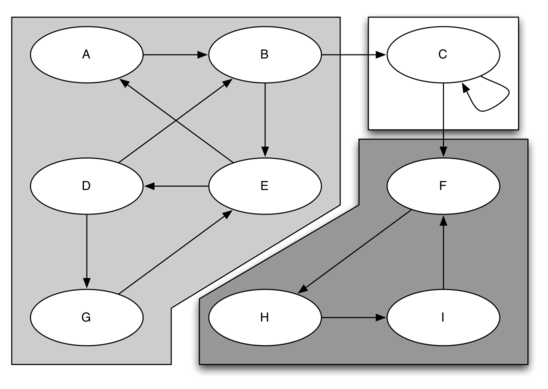

Once the strongly connected components have been identified we can show a simplified view of the graph by combining all the vertices in one strongly connected component into a single larger vertex. The simplified version of the graph above is shown below
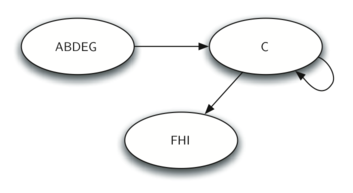

## Min. spanning tree - Prim's algo
S.t. for a graph G = (V,E) is __acyclic subset of E connecting all vertices in V__  
(sum of edge weights minimized)  
Most efficient info flow. There may be several spanning trees -  
we need to find the minimum one.  
Using priority queue to select next vertex for growing graph

In [8]:
from collections import defaultdict
import heapq
def min_spanning_tree(graph, start):
    ''' Outputs mst - min. spanning tree '''
    mst     = defaultdict(set)
    visited = set([ start ])
    edges   = [ (cost, start, to)
                for to, cost in graph[start].items() ]
    heapq.heapify(edges)
    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for to_next, cost in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))
    return mst


example_graph = {
    'A': {'B': 2, 'C': 3},
    'B': {'A': 2, 'C': 1, 'D': 1, 'E': 4},
    'C': {'A': 3, 'B': 1, 'F': 5},
    'D': {'B': 1, 'E': 1},
    'E': {'B': 4, 'D': 1, 'F': 1},
    'F': {'C': 5, 'E': 1, 'G': 1},
    'G': {'F': 1},
}

dict(create_spanning_tree(example_graph, 'A'))

{'A': {'B'}, 'B': {'C', 'D'}, 'D': {'E'}, 'E': {'F'}, 'F': {'G'}}

Graph algos (find Python): https://www.programiz.com/dsa/spanning-tree-and-minimum-spanning-tree, https://www.programiz.com/dsa/bellman-ford-algorithm, https://www.programiz.com/dsa/dijkstra-algorithm + other links on the same page

## TREE REPRESENTATIONS AND TRAVERSALS

https://bradfieldcs.com/algos/trees/representing-a-tree/  
https://pythonspot.com/python-tree/  
http://www.cs.utsa.edu/~wagner/python/tree.lists/trees.html

TYPES OF TREES:  
* __m-ary tree__ - rooted tree, each node has no more than m children
* __Binary tree__ (BT) - each node has _at most two children_
* __Complete__ BT = bin tree, __every level is full__, except possibly last (far __left__).
* __BST__ - parent's value greater that values in left subtree & less values in right subtree
* __Binary Heap__ (max / min) = cbt, parent >(<) children
* __Full__ (proper or plane) BT - every node has _0 or 2 children_
* __Perfect__ BT - all interior nodes have two children and all leaves have same depth
* __Infinite complete__ BT - every node has two children (infinite levels)
* __Balanced__ BT - L and R subtrees of each node differ in height by no more than 1
* __Degenerate (pathological)__ tree - each parent has only one child = __linked list__

__THEORY__
* __Red–black__ tree is a kind of __self-balancing BST__. Each node stores an extra bit representing color, used to ensure that the tree remains approximately balanced during insertions and deletions. Rules:


1. Every node is either red or black.  
2. Every leaf (NULL) is black.  
3. If a node is red, then both its children are black.  
4. Every simple path from a node to a descendant leaf contains the same number of black nodes  

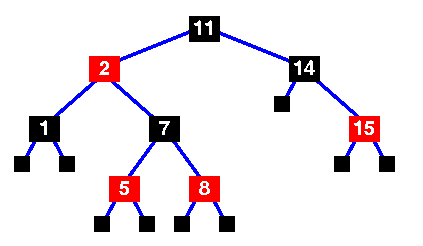
Lemma  
A red-black tree with n internal nodes has __height at most 2log(n+1)__ - RBTs are good for search: can always be __searched in O(log n) time__ (insertions and deletions too while usually it's O(h) or even O(n) for imbalanced tree)


* __Randomized quicksort__: random number to pick next __random pivot__ (or shuffle the array). `randpivot = random.randrange(start, stop)`


* __Minimum cut__ - min subset of edges that, when removed, __disconnects__ [undirected, weighted] graph. Application: in communications, nodes of the cut are critical for network integrity


* __Spanning tree__ - subgraph (tree) of undirected graph that includes __ALL VERTICES & MIN # EDGES__ (can be several, but min. s. t. = min. sum of weights)

### 1. TREE REPRESENTATION (object, list, dictionary)

#### 1a. OBJECT

In [25]:
# Node as class
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
    
    def insert_left(self, child):
        if self.left is None:
            self.left = child
        else:
            child.left = self.left
            self.left = child
        
    def insert_right(self, child):
        if self.right is None:
            self.right = child
        else:
            child.right = self.right
            self.right = child

In [27]:
# NO NEED TO EVEN USE INSERT FUNCTIONS!
root = Node('a')
print(root.val)  
print(root.left) 

root.left = Node('b')
print(root.left)  
print(root.left.val)  

root.right = Node('c')
print(root.right)  
print(root.right.val)  

root.right.val = 'hello'
print(root.right.val)

a
None
b
c
hello


In [26]:
# USING THE INSERT FUNCTIONS
root = Node('a')
print(root.val)  # => 'a'
print(root.left)  # => None

root.insert_left(Node('b'))
print(root.left)  # => <__main__.Node object>
print(root.left.val)  # => 'b'

root.insert_right(Node('c'))
print(root.right)  # => <__main__.Node object>
print(root.right.val)  # => 'c'

root.right.val = 'hello'
print(root.right.val)  # => 'hello'

a
None
b
c
hello


#### 1b. LIST
This generalizes to a tree that has many subtrees (more than binary tree) - another subtree is just another list

In [ ]:
# LIST
tree = [
    'a',  #root
    [
        'b',  # left subtree
        ['d' [], []],
        ['e' [], []]
    ],
    [
        'c',  # right subtree
        ['f' [], []],
        []
    ]
]

In [28]:
tree = ['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]

# the root
print(tree[0])  # => 'a'

# the left subtree
print(tree[1])  # => ['b', ['d', [], []], ['e', [], []]]

# the right subtree
print(tree[2])  # => ['c', ['f', [], []], []]

['b', ['d', [], []], ['e', [], []]]
['c', ['f', [], []], []]
a


To __add left subtree__ to root - insert __new list into second position of root list__. Careful: if the list already has something in the second position - keep track of it and push it down the tree as left child of list being added

In [29]:
def BinaryTree(r):
    return [r, [], []]

def insert_left(root, child_val):
    subtree = root.pop(1)
    if len(subtree) > 1:
        root.insert(1, [child_val, subtree, []])
    else:
        root.insert(1, [child_val, [], []])
    return root

def insert_right(root, child_val):
    subtree = root.pop(2)
    if len(subtree) > 1:
        root.insert(2, [child_val, [], subtree])
    else:
        root.insert(2, [child_val, [], []])
    return root

# abstract away the use of positions in list to represent tree, left subtrees and right subtrees
def get_root_val(root):
    return root[0]

def set_root_val(root, new_val):
    root[0] = new_val

def get_left_child(root):
    return root[1]

def get_right_child(root):
    return root[2]

In [30]:
root = [3, [], []]
insert_left(root, 4)
insert_left(root, 5)
insert_right(root, 6)
insert_right(root, 7)
left = get_left_child(root)
print(left)  # => [5, [4, [], []], []]

set_root_val(left, 9)
print(root)  # => [3, [9, [4, [], []], []], [7, [], [6, [], []]]]

insert_left(left, 11)
print(root)  # => [3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
print(get_right_child(get_right_child(root)))  # => [6, [], []]

[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


#### 1c. MAP (DICTIONARY)
* PROs of list representation: succinct, __easily construct, serialize and print trees, portable to languages and contexts without objects__.  
* CONs: __difficult to see the tree-like nature__ of the composite lists.

Therefore, using a very similar representation with __nested mappings (dicts) is preferred__ in practice + we can name children, values and potentially other data in a node. If there are no subtrees, there is only a value component

In [32]:
# Binary tree
binary_tree = {

    'val': 'A',
    'left': {
        'val': 'B',
        'left': {'val': 'D'},
        'right': {'val': 'E'}
    },
    'right': {
        'val': 'C',
        'right': {'val': 'F'}
    }
}

In [43]:
print("Left node's value:", binary_tree['left']['val'])
print('Left subtree:', binary_tree['left'])
print("Right node's value:", binary_tree['right']['val'])
print('Right subtree:', binary_tree['right'])
print('Root:', binary_tree['val'])
print('Entire tree:', binary_tree)

Left node's value: B
Left subtree: {'val': 'B', 'left': {'val': 'D'}, 'right': {'val': 'E'}}
Right node's value: C
Right subtree: {'val': 'C', 'right': {'val': 'F'}}
Root: A
Entire tree: {'val': 'A', 'left': {'val': 'B', 'left': {'val': 'D'}, 'right': {'val': 'E'}}, 'right': {'val': 'C', 'right': {'val': 'F'}}}


In [44]:
# Non-binary tree - use 'children' key instead of 'left' / 'right'
{
    'val': 'A',
    'children': [
        {
            'val': 'B',
            'children': [
                {'val': 'D'},
                {'val': 'E'},
            ]
        },
        {
            'val': 'C',
            'children': [
                {'val': 'F'},
                {'val': 'G'},
                {'val': 'H'}
            ]
        }
    ]
}

{'val': 'A',
 'children': [{'val': 'B', 'children': [{'val': 'D'}, {'val': 'E'}]},
  {'val': 'C', 'children': [{'val': 'F'}, {'val': 'G'}, {'val': 'H'}]}]}

### 1d. Convert Array to Tree
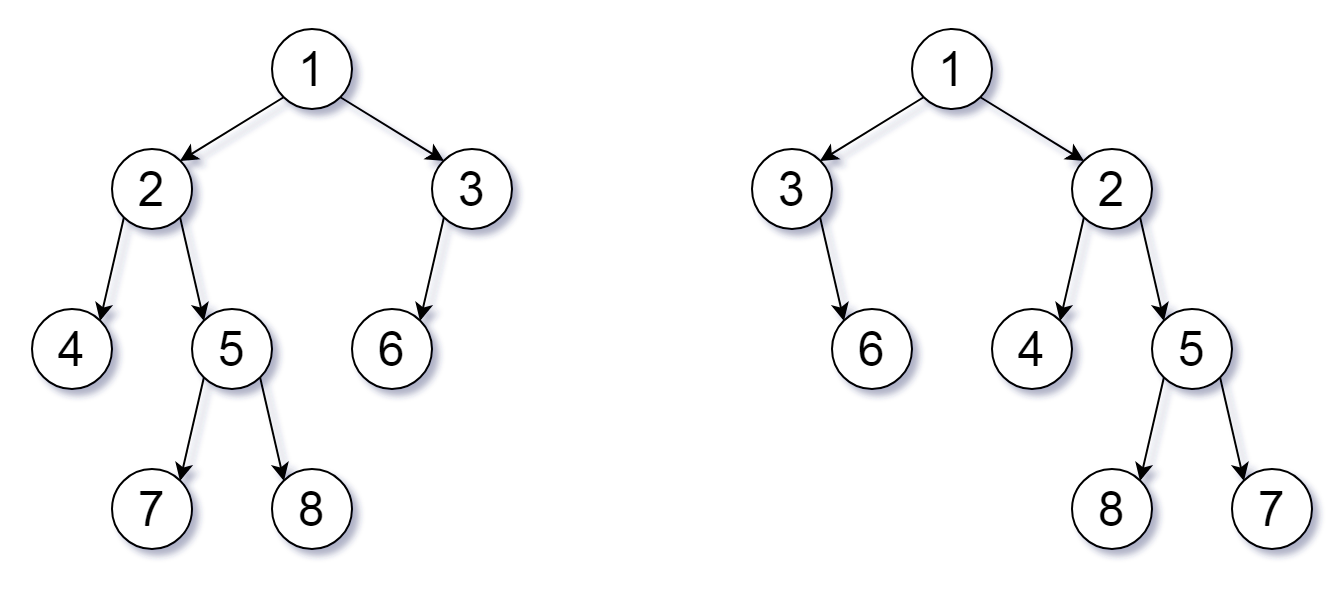

In [1]:
# level-order traversal
def bfs(root):
    res = []
    if not root:
        return res    
    q = [root]
    while q:
        node = q.pop(0)
        res.append(node.val)
        if node.left:
            q.append(node.left)
        if node.right:
            q.append(node.right)
    return res        

In [2]:
# build tree - time = space = O(n)
class Node:
    def __init__(self, val):
        self.val = val
        self.left = self.right = None

def insertLevelOrder(arr, i, n):
    root = None    
    if i < n:                     # base case
        root = Node(arr[i])
        root.left  = insertLevelOrder(arr, 2*i + 1, n)
        root.right = insertLevelOrder(arr, 2*i + 2, n)         
    return root


arr = [1,2,3,4,5,6,None,None,None,7,8 ]
n = len(arr)
root = insertLevelOrder(arr, 0, n)
bfs(root)

[1, 2, 3, 4, 5, 6, None, None, None, 7, 8]

### 2. TRAVERSALS

### 2a. Depth First Traversals (Binary Tree)

In [5]:
# time O(n),space O(h),h=height 
class Node: 
    def __init__(self, val): 
        self.val = val
        self.left = None
        self.right = None

# Root Left Right 
def Preorder(root):   
    if root:
        print(root.val, end=' ')
        Preorder(root.left)
        Preorder(root.right)
        
# Left Right Root
def Postorder(root):  
    if root:
        Postorder(root.left) 
        Postorder(root.right) 
        print(root.val, end=' '), 

# Left Root Right
def Inorder(root):  
    if root: 
        Inorder(root.left)
        print(root.val, end=' '), 
        Inorder(root.right)      

In [6]:
root            = Node(1)
root.left       = Node(2)
root.right      = Node(3)
root.left.left  = Node(4)
root.left.right = Node(5)
print("Preorder traversal:")
Preorder(root) 
  
print("\nPostorder traversal:")
Postorder(root)

print("\nInorder traversal:")
Inorder(root) 

Preorder traversal:
1 2 4 5 3 
Postorder traversal:
4 5 2 3 1 
Inorder traversal:
4 2 5 1 3 

### 2b. Breadth First Traversal
Level Order Tree Traversal
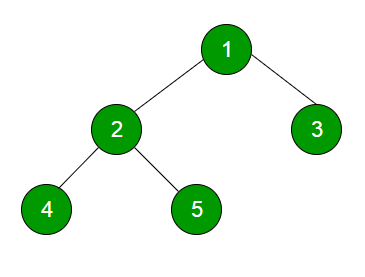
1, 2, 3, 4, 5

In [6]:
# time O(n), space O(n)
class Node: 
    # create a new node 
    def __init__(self, key): 
        self.val = key 
        self.left = None
        self.right = None

# print height
def LevelOrder(root):    
    # base case 
    if root is None:
        return      
    queue = [] 
    queue.append(root)   
    while(len(queue) > 0):         
        node = queue.pop(0)                 # print and remove front of queue
        print(node.val, end=' ')  
        if node.left is not None: 
            queue.append(node.left)  
        if node.right is not None: 
            queue.append(node.right)

## BFS (recursive) incl. height

In [3]:
# Recursive - time O(n^2), space O(n)
def LevelOrder_rec(root):
    h = height(root) 
    for i in range(1, h+1): 
        printGivenLevel(root, i)  

# print nodes at a given level 
def printGivenLevel(root , level): 
    if root is None: 
        return
    if level == 1: 
        print(root.val, end=" ") 
    elif level > 1 : 
        printGivenLevel(root.left , level-1)                         # if saving in a list: res += printGivenLevel()
        printGivenLevel(root.right , level-1) 

# compute height - number of nodes from root to farthest leaf node 
def height(node): 
    if node is None: 
        return 0 
    else : 
        # Compute the height of each subtree  
        lheight = height(node.left) 
        rheight = height(node.right) 
  
        #Use the larger one 
        if lheight > rheight : 
            return lheight+1
        else: 
            return rheight+1

In [7]:
root = Node(1) 
root.left = Node(2) 
root.right = Node(3) 
root.left.left = Node(4) 
root.left.right = Node(5)  
LevelOrder_rec(root)

print("\nQueue-based level order traversal:")
LevelOrder(root)

Recursive level order traversal:
1 2 3 4 5 
Queue-based level order traversal:
1 2 3 4 5 

In [ ]:
# StackOverflow
class Solution:
    def inorderTraversal(self, root):
        return (self.inorderTraversal(root.left) + [root.val] + self.inorderTraversal(root.right)) if root else []

## TREE SOLUTIONS

In [31]:
# A full BT = BT where every node has either 0 or 2 children. Examples:
'''
        1
      /   \
    2       3
  /  \     /  \
 4    5   6    7


       1
     /   \
   2      3
        /   \  
       4     5
           /   \  
          6    7
                  

          1
        /   \
      2       3
    /  \     /  \
   4    5   6    7
 /  \  
8    9 
'''
pass

### Another way to build a BT

In [30]:
class Node: 
    
    def __init__(self, data, left=None, right=None): 
        self.val = data 
        self.left = left 
        self.right = right
        
# Left Root Right
def inorder(root): 
  
    if root:        
        inorder(root.left) 
        print(root.val, end=' '), 
        inorder(root.right)      

root = Node(1, 
            right = Node(3), 
            left  = Node(2, 
                         left = Node(4), 
                         right = Node(5) 
            ) 
       )
Inorder(root)

4 2 5 1 3 

## Check if tree is BST

In [ ]:
# If BST=>inorder traversal = sorted list
def inorder( root ):
    if tree != None:
        inorder(root.left)
        tree_vals.append(root.val)
        inorder(root.right)
        
def sort_check( tree_vals ):
    return tree_vals == sorted(tree_vals)                # just iterate list for O(n) solution

tree_vals = []
inorder(tree)
sort_check(tree_vals)

In [72]:
# Udemy
# Another classic solution: keep track of min and max values a node can take - at each node we check if its value
# is between min and max values it’s allowed to take. Root = any value between neg infinity and pos infinity.
# Left child should be smaller than or equal than root, right child should be larger than or equal to root.
# During recursion, send current value as new max to left child and send min without changing.
# Send current value as new min to right child and send max without changing

class Node:
    def __init__(self, k, val):
        self.key = k
        self.value = val
        self.left = None
        self.right = None

def tree_max(node):
    if not node:
        return float("-inf")
    maxleft  = tree_max(node.left)
    maxright = tree_max(node.right)
    return max(node.key, maxleft, maxright)

def tree_min(node):
    if not node:
        return float("inf")
    minleft  = tree_min(node.left)
    minright = tree_min(node.right)
    return min(node.key, minleft, minright)

def verify(node):
    if not node:
        return True
    if (tree_max(node.left) <= node.key <= tree_min(node.right) and
        verify(node.left) and verify(node.right)):
        return True
    else:
        return False

In [73]:
root= Node(10, "Hello")
root.left = Node(5, "Five")
root.right= Node(30, "Thirty")

print(verify(root)) # prints True, since this tree is valid

root = Node(10, "Ten")
root.right = Node(20, "Twenty")
root.left = Node(5, "Five")
root.left.right = Node(15, "Fifteen")

print(verify(root)) # prints False, since 15 is to the left of 10

True
False


## BST nodes in given range

In [4]:
#Time O(h + k), k=num nodes
class newNode:
    def __init__(self, data): 
        self.data = data 
        self.left = None
        self.right = None
                
        
def getCount(root, low, high):
    if root == None: return 0
    if root.data==high and root.data==low: 
        return 1
    if root.data <= high and root.data >= low: 
        return (1 + getCount(root.left, low, high) +\
                getCount(root.right, low, high))
    elif root.data < low: 
        return getCount(root.right, low, high)
    else:
        return getCount(root.left, low, high)

In [ ]:
# Let us construct the BST shown in 
# the above figure 
root = newNode(10) 
root.left = newNode(5) 
root.right = newNode(50) 
root.left.left = newNode(1) 
root.right.left = newNode(40)
root.right.right = newNode(100)

# Let us constructed BST shown in above example 
#         10 
#       /   \ 
#     5     50 
#   /       / \ 
#  1       40 100

l = 5
h = 45
print("Count of nodes between [", l, ", ", h,"] is ", getCount(root, l, h))

## BST node w/value closest to k

In [ ]:
def closest_value(root, k):
    a = root.val
    child = root.left if k < a else root.right
    if not child:
        return a
    b = closest_value(child, k)    
    return min(k-a, k-b)

In [ ]:
"""
Write f(x) count_left_node() to return num of left children in tree.
For example: four left children here (6, 3, 7, and 10):

                    9
                 /      \
               6         12
              / \       /   \
            3     8   10      15
                 /              \
                7                18

    count_left_node = 4

"""
from bst import Node
from bst import bst

def count_left_node(root):
        
    if root is None:
        return 0
    elif root.left is None:
        return count_left_node( root.right )
    else:
        return 1 + count_left_node(root.left) + count_left_node(root.right)

In [ ]:
"""
Implement a trie with insert, search, and startsWith methods.

Note:
You may assume that all inputs consist of lowercase letters a-z.
"""
from collections import defaultdict


class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode)
        self.is_word = False


class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        current = self.root
        for letter in word:
            current = current.children[letter]
        current.is_word = True

    def search(self, word):
        current = self.root
        for letter in word:
            current = current.children.get(letter)
            if current is None:
                return False
        return current.is_word

    def starts_with(self, prefix):
        current = self.root
        for letter in prefix:
            current = current.children.get(letter)
            if current is None:
                return False
        return True

## Trim BST

In [4]:
def trimBST(tree, minVal, maxVal):    
    if not tree: return    
    tree.left=trimBST(tree.left, minVal, maxVal) 
    tree.right=trimBST(tree.right, minVal, maxVal)    
    if minVal<=tree.val<=maxVal: 
        return tree    
    if tree.val < minVal: 
        return tree.right    
    if tree.val > maxVal: 
        return tree.left 

The complexity of this algorithm is O(N), where N is the number of nodes in the tree. Because we basically perform a post-order traversal of the tree, visiting each and every node one. This is optimal because we should visit every node at least once. This is a very elegant question that demonstrates the effectiveness of recursion in trees. 

## Check if 2 BTs equal

In [ ]:
# time O(min(N,M)), N,M=# nodes
# space O(min(h1, h2))
def is_same_tree(p, q):
    if not p and not q:
        return True
    if p and q and p.val == q.val:
        return is_same_tree(p.left, q.left) and\
               is_same_tree(p.right, q.right)
    return False

## Invert a binary tree

In [ ]:
def reverse(root):        
    if not root: return
    root.left,root.right=root.right,root.left
    if root.left:
        reverse(root.left)
    if root.right:
        reverse(root.right)

### Find deepest left node

In [31]:
# Given a binary tree, find the deepest node
# that is the left child of its parent node.

# Example:

     # 1
   # /   \
  # 2     3
 # / \     \
# 4   5     6
           # \
            # 7
# should return 4.


class Node:
    def __init__(self, val = None):
        self.val = val
        self.left = None
        self.right = None
        

class DeepestLeft:
    def __init__(self):
        self.depth = 0
        self.Node = None

def find_deepest_left(root, is_left, depth, res):
    if not root:
        return
    if is_left and depth > res.depth:
        res.depth = depth
        res.Node = root
    find_deepest_left(root.left, True, depth + 1, res)
    find_deepest_left(root.right, False, depth + 1, res)

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.right = Node(6)
root.right.right.right = Node(7)

res = DeepestLeft()
find_deepest_left(root, True, 1, res)
if res.Node:
    print(res.Node.val)

4


## Min / Max height

In [48]:
def max_height(root):        
    if not root: return 0
    return max(max_height(root.left),\
               max_height(root.right)) + 1

def min_height(root):        
    if not root: return 0        
    if not root.left or not root.right:
        return max(min_height(root.left),\
                   min_height(root.right))+1        
    return min(min_height(root.left),\
               min_height(root.right)) + 1

In [49]:
tree = Node(10)
tree.left = Node(12)
tree.right = Node(15)
tree.left.left  = Node(25)
tree.left.left.right  = Node(100)
tree.left.right = Node(30)
tree.right.left = Node(36)

print_tree(tree)
print()

maxHeight = max_height(tree)
print("Max height:", maxHeight)

minHeight = min_depth(tree)
print("Min height:", minHeight)

10 12 25 100 30 15 36 
Max height: 4
Min height: 3


### Check if BT is balanced

In [ ]:
# time O(n)
def is_balanced(root):
    return -1 != get_depth(root)
# return 0 if unbalanc. else depth+1
def get_depth(root):
    if not root:
        return 0
    left  = get_depth(root.left)
    right = get_depth(root.right)
    if abs(left-right) > 1 or\
       left == -1 or right == -1:
        return -1
    return 1 + max(left, right)

## Lowest common ancestor (any BT)

In [ ]:
def lca(root, p, q):
    if not root or root is p or root is q:
        return root
    left = lca(root.left, p, q)
    right = lca(root.right, p, q)
    if left and right:
        return root
    return left if left else right

## LCA in BST

In [4]:
# Time c. O(h), space c. O(1)
def lca(root, n1, n2):    
    if root is None: return None
    if(root.data > n1 and root.data > n2): 
        return lca(root.left, n1, n2)
    if(root.data < n1 and root.data < n2): 
        return lca(root.right, n1, n2)  
    return root 
  
    
root = Node(20) 
root.left = Node(8) 
root.right = Node(22) 
root.left.left = Node(4) 
root.left.right = Node(12) 
root.left.right.left = Node(10) 
root.left.right.right = Node(14) 
  
n1 = 10 ; n2 = 14
t = lca(root, n1, n2) 
print('LCA of %d and %d is %d' %(n1, n2, t.data))
  
n1 = 14 ; n2 = 8
t = lca(root, n1, n2) 
print('LCA of %d and %d is %d' %(n1, n2 , t.data))
  
n1 = 10 ; n2 = 22
t = lca(root, n1, n2) 
print('LCA of %d and %d is %d' %(n1, n2, t.data))

LCA of 10 and 14 is 12
LCA of 14 and 8 is 8
LCA of 10 and 22 is 20


## Maximum path sum

In [1]:
#Time O(n), space O(h): balanced O(logn), skewed O(n)
def max_path_sum(root):
    max_sum = float('-inf')
    def gain(root):
        nonlocal max_sum
        if not root: return 0
        # only pos values
        left  = max(gain(root.left), 0)
        right = max(gain(root.right),0)
        # update global max_sum
        new_path = root.val+left+right
        max_sum = max(max_sum, new_path) 
        # return max gain if continue same path up
        return root.val + max(left, right)
    gain(root)
    return max_sum

In [4]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.left = None
        self.right = None
        
root = Node(20) 
root.left = Node(8) 
root.right = Node(22) 
root.left.left = Node(4) 
root.left.right = Node(12) 
root.left.right.left = Node(10) 
root.left.right.right = Node(15)

max_path_sum(root)

77

### Check if BT has a path sum

In [68]:
"""
Given a binary tree and a sum, determine if the tree has a root-to-leaf
path such that adding up all the values along the path equals the given sum.

For example:
Given the below binary tree and sum = 22,
              5
             / \
            4   8
           /   / \
          11  13  4
         /  \      \
        7    2      1
return true, as there exist a root-to-leaf path 5->4->11->2 which sum is 22.
"""
class Node:
    def __init__(self, val = 0):
        self.val = val
        self.left = None
        self.right = None


def has_path_sum(root, sum):
    """
    :type root: TreeNode
    :type sum: int
    :rtype: bool
    """
    if not root:
        return False
    if not root.left and not root.right and root.val == sum:
        return True
    sum -= root.val
    return has_path_sum(root.left, sum) or has_path_sum(root.right, sum)


# DFS with stack
def has_path_sum2(root, sum):
    if not root:
        return False
    stack = [(root, root.val)]
    while stack:
        node, val = stack.pop()
        if not node.left and not node.right:
            if val == sum:
                return True
        if node.left:
            stack.append((node.left, val+node.left.val))
        if node.right:
            stack.append((node.right, val+node.right.val))
    return False


# BFS with queue
def has_path_sum3(root, sum):
    if not root:
        return False
    queue = [(root, sum-root.val)]
    while queue:
        node, val = queue.pop(0)  # popleft
        if not node.left and not node.right:
            if val == 0:
                return True
        if node.left:
            queue.append((node.left, val-node.left.val))
        if node.right:
            queue.append((node.right, val-node.right.val))
    return False

tree = Node(10)
tree.left = Node(12)
tree.right = Node(15)
tree.left.left  = Node(25)
tree.left.left.right  = Node(100)
tree.left.right = Node(30)
tree.right.left = Node(36)

print_tree(tree)
print()

# see why it is not working as expected
for i in range(500):
    if has_path_sum(tree, i):
        print(i)

10 12 25 100 30 15 36 
52
61
147


### Sorted array to BST

In [ ]:
"""
Given an array where elements are sorted in ascending order,
convert it to a height balanced BST.
"""


class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


def array_to_bst(nums):
    if not nums:
        return None
    mid = len(nums)//2
    node = TreeNode(nums[mid])
    node.left = array_to_bst(nums[:mid])
    node.right = array_to_bst(nums[mid+1:])
    return node

## Trees - Top 10 Algorithms in Interview Questions (Geeksforgeeks.com)

### Distance between two nodes of a Binary Tree
Using lowest common ancestor (LCA):

Dist(n1, n2) = Dist(root, n1) + Dist(root, n2) - 2*Dist(root, LCA)
'n1' and 'n2' are the two given nodes (their values)

Time c. O(n)?

In [32]:
# binary tree node
class Node: 
    
    def __init__(self, data): 
        self.data = data 
        self.left = self.right = None
  
  
# find LCA 
def LCA(root, n1, n2): 
      
    # Base case 
    if root is None: 
        return None

    if root.data == n1 or root.data == n2: 
        return root 
  
    # Look for keys in left and right subtrees 
    left = LCA(root.left, n1, n2) 
    right = LCA(root.right, n1, n2) 
  
    if left is not None and right is not None: 
        return root 

    if left: 
        return left 
    else: 
        return right 
  
  
# find distance of any node from root
def findLevel(root, data, d, level):      
    
    if root is None:                                                           # base case 
        return  
    
    if root.data == data:                                                      # node found  
        d.append(level) 
        return
  
    findLevel(root.left, data, d, level + 1) 
    findLevel(root.right, data, d, level + 1) 
    
    
def findDistance(root, n1, n2): 
      
    lca = LCA(root, n1, n2)    
    d1 = []                                                                    # distance(n1, lca)    
    d2 = []                                                                    # distance(n2, lca)  
  
    
    if lca:                                                                    # if lca exist          
        
        findLevel(lca, n1, d1, 0)        
        findLevel(lca, n2, d2, 0)  
        return d1[0] + d2[0]
        
    else: 
        return -1
  
 
root = Node(1) 
root.left = Node(2) 
root.right = Node(3) 
root.left.left = Node(4) 
root.left.right = Node(5) 
root.right.left = Node(6) 
root.right.right = Node(7) 
root.right.left.right = Node(8) 
  
print("Dist(4,5) = ", findDistance(root, 4, 5)) 
print("Dist(4,6) = ", findDistance(root, 4, 6)) 
print("Dist(3,4) = ", findDistance(root, 3, 4)) 
print("Dist(2,4) = ", findDistance(root, 2, 4)) 
print("Dist(8,5) = ", findDistance(root, 8, 5)) 

Dist(4,5) =  2
Dist(4,6) =  4
Dist(3,4) =  3
Dist(2,4) =  1
Dist(8,5) =  5


### Maximum Path Sum in a Binary Tree
Four ways that the max path goes through each node:
1. Node only
2. Max path through Left Child + Node
3. Max path through Right Child + Node
4. Max path through Left Child + Node + Max path through Right Child

Keep track of the four paths and pick the max one in the end. Important: root of every subtree need to return max path sum such that at most one child of root is involved - needed for parent function call. In below code, this sum is stored in 'max_single' and returned by the recursive function

In [3]:
# A Binary Tree Node 
class Node: 
      
    # Contructor to create a new node 
    def __init__(self, data): 
        self.data = data 
        self.left = None
        self.right = None


# Return maximum path sum in 'res' + return max path sum going through root
def findMaxUtil(root):
      
    # base case
    if root is None:
        return 0
    
    l = findMaxUtil(root.left)
    r = findMaxUtil(root.right)

    max_single = max(max(l, r) + root.data, root.data)

    max_top = max(max_single, l + r + root.data)
  
    # Static variable to store the maximum result
    findMaxUtil.res = max(findMaxUtil.res, max_top)
  
    return max_single 


# Return max path sum in tree with given root 
def findMaxSum(root): 
      
    # Initialize result 
    findMaxUtil.res = float("-inf") 
      
    # Compute and return result 
    findMaxUtil(root) 
    return findMaxUtil.res 
  
root = Node(10) 
root.left = Node(2) 
root.right   = Node(10); 
root.left.left  = Node(20); 
root.left.right = Node(1); 
root.right.right = Node(-25); 
root.right.right.left   = Node(3); 
root.right.right.right  = Node(4); 
print("Max path sum is " ,findMaxSum(root))

Max path sum is  42


### Check if a binary tree is full
A full binary tree (BT) - all nodes have either zero or two child nodes OR no node has one child node:  
1) If a BT node is NULL => full BT  
2) If a BT node has empty left and right sub-trees => full BT (a leaf node)  
3) If a BT node has left and right sub-trees => it's part of a full BT, recursively check its left and right sub-trees  
4) Any other case => not a full BT

In [8]:
# BT node 
class Node: 
      
    def __init__(self , key): 
        self.key = key 
        self.left = None
        self.right = None


def isFullTree(root): 
  
    # If empty tree 
    if root is None:     
        return True
      
    # If a leaf node 
    if root.left is None and root.right is None: 
        return True
  
    # If both left & right subtrees != None and are full 
    if root.left is not None and root.right is not None: 
        return (isFullTree(root.left) and isFullTree(root.right)) 
      
    # If we reach here - none of the above conditions held 
    return False
  
# Driver Program 
root = Node(10); 
root.left = Node(20); 
root.right = Node(30); 
  
root.left.right = Node(40); 
root.left.left = Node(50); 
root.right.left = Node(60); 
root.right.right = Node(70); 
  
root.left.left.left = Node(80); 
root.left.left.right = Node(90); 
root.left.right.left = Node(80); 
root.left.right.right = Node(90); 
root.right.left.left = Node(80); 
root.right.left.right = Node(90); 
root.right.right.left = Node(80); 
root.right.right.right = Node(90); 
  
if isFullTree(root): 
    print('BT is full')
else: 
    print('BT is not full')

BT is full


### Check if a binary tree is subtree of another binary tree
Traverse the tree T in preorder fashion. For every visited node in the traversal, see if the subtree rooted with this node is identical to S.  
Time c. O(mn) in worst case where m & n # nodes in the given two trees. O(n) is possible, but not clear on Geeksforgeeks (and doesn't have a Python version)

In [5]:
# BT node 
class Node:  
    def __init__(self, data): 
        self.data = data  
        self.left = None
        self.right = None

# check if two trees are identical 
def areIdentical(root1, root2):      
    
    if root1 is None and root2 is None:                                             # base case
        return True
    if root1 is None or root2 is None: 
        return False
  
    # check both roots are the same and left & right subtrees are the same 
    return (root1.data == root2.data and 
            areIdentical(root1.left , root2.left) and
            areIdentical(root1.right, root2.right)
            )  
  
# check if subtree 
def isSubtree(T, S):      
    
    if S is None:                                                                    # base case
        return True
  
    if T is None: 
        return False
     
    if (areIdentical(T, S)): 
        return True
  
    # if none of the above try left and right subtrees one by one
    return isSubtree(T.left, S) or isSubtree(T.right, S) 
  

""" TREE 1 
     Construct the following tree 
              26 
            /   \ 
          10     3 
        /    \     \ 
       4      6     3 
       \ 
        30 
    """
  
T = Node(26) 
T.right = Node(3) 
T.right.right  = Node(3) 
T.left = Node(10) 
T.left.left = Node(4) 
T.left.left.right = Node(30) 
T.left.right = Node(6) 
  
""" TREE 2 
     Construct the following tree 
          10 
        /    \ 
       4      6 
        \ 
         30 
    """
S = Node(10) 
S.right = Node(6) 
S.left = Node(4) 
S.left.right = Node(30) 
  
if isSubtree(T, S): 
    print('Tree 2 is subtree of Tree 1')
else: 
    print('Tree 2 is not a subtree of Tree 1')

Tree 2 is subtree of Tree 1


### Reverse alternate levels of a perfect binary tree

A simple solution is to do following steps:  
1) Access nodes level by level.  
2) If current level is odd, then store nodes of this level in an array.  
3) Reverse the array and store elements back in tree.

In [12]:
"""
Given tree: 
               a
            /     \
           b       c
         /  \     /  \
        d    e    f    g
       / \  / \  / \  / \
       h  i j  k l  m  n  o 

Modified tree:
               a
            /     \
           c       b
         /  \     /  \
        d    e    f    g
       / \  / \  / \  / \
      o  n m  l k  j  i  h 
"""

class Node:  

    def __init__(self, key):  
        self.key = key  
        self.left = None
        self.right = None
        
        
def preorder(root1, root2, lvl):      
    
    if (root1 == None or root2 == None):                                  # base case
        return  
    
    if (lvl % 2 == 0):                                                    # swap subtrees if level is even
        t = root1.key 
        root1.key = root2.key 
        root2.key = t    
    
    preorder(root1.left, root2.right, lvl + 1)                            # recur for left and right subtrees
    preorder(root1.right, root2.left, lvl + 1) 
    
    
def reverseAlternate(root): 
    preorder(root.left, root.right, 0) 
    
    
# inorder traversal (print initial trees)
def printInorder(root):
        
    if (root == None): 
        return
        
    printInorder(root.left) 
    print( root.key, end = " ") 
    printInorder(root.right) 


root = Node('a')
root.left = Node('b')
root.right = Node('c')
root.left.left = Node('d')
root.left.right = Node('e')
root.right.left = Node('f')
root.right.right = Node('g')
root.left.left.left = Node('h')
root.left.left.right = Node('i')
root.left.right.left = Node('j')
root.left.right.right = Node('k')
root.right.left.left = Node('l') 
root.right.left.right = Node('m')
root.right.right.left = Node('n')
root.right.right.right = Node('o')

print( "Inorder traversal of initial tree")
printInorder(root)

reverseAlternate(root)

print("\nInorder traversal of modified tree")
printInorder(root)

Inorder traversal of initial tree
h d i b j e k a l f m c n g o 
Inorder traversal of modified tree
o d n c m e l a k f j b i g h 

### Print Nodes of Binary Tree in Top View (aka External Nodes)
Top view - nodes visible when the tree is viewed from the top (printed in any order). Expected time complexity is O(n). Not too clear what a top view is - why 6 in the second example below is printed last? Because of in any order?

In [14]:
'''
       1
    /     \
   2       3
  /  \    / \
 4    5  6   7
Top view of the above binary tree is
4 2 1 3 7

        1
      /   \
    2       3
      \   
        4  
          \
            5
             \
               6
Top view of the above binary tree is
2 1 3 6
'''

class Node:
    def __init__(self, key):  
        self.data = key  
        self.left = None
        self.right = None

# f(x) to fill the map 
def fillMap(root, d, l, m): 
    if(root == None): 
        return
      
    if d not in m: 
        m[d] = [root.data,l] 
    elif(m[d][1] > l): 
        m[d] = [root.data,l] 
    fillMap(root.left, d - 1, l + 1, m) 
    fillMap(root.right, d + 1, l + 1, m) 

# f(x) to print top view of BT 
def topView(root): 
      
    # map to store the pair of node value and its level  
    # with respect to the vertical distance from root.  
    m = {} 
      
    fillMap(root, 0, 0, m) 
    for it in sorted (m.keys()): 
        print(m[it][0], end = " ") 
        
        
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.right = Node(4)
root.left.right.right = Node(5)
root.left.right.right.right = Node(6)
print('Following are nodes in top view of Binary Tree')
topView(root)

Following are nodes in top view of Binary Tree
2 1 3 6 